In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
data_t=pd.read_csv("D:\\data_sets\\jaysree\\train_data.csv")

In [3]:
data_t.shape

(22624345, 6)

In [4]:
data_t.drop(data_t[data_t["sales"]<0].index,inplace=True)

every year new medicines are addind

<AxesSubplot:ylabel='Frequency'>

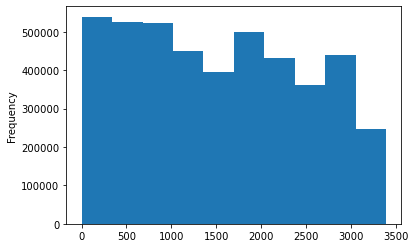

In [5]:
#data_t[data_t.year==2015].medicine.plot.hist()
#data_t[data_t.year==2016].medicine.plot.hist()
#data_t[data_t.year==2017].medicine.plot.hist()
data_t[data_t.year==2018].medicine.plot.hist()

Every year sales are increasing

<AxesSubplot:xlabel='year'>

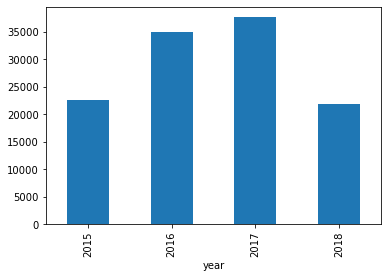

In [6]:
year_sales=data_t.groupby("year")["sales"].sum()/10000
year_sales.plot.bar()

In [7]:
#med2015_sale=data_t[data_t["year"]==2015].groupby("medicine")["sales"].sum()


In [8]:
#plt.plot(med2015_sale.index,med2015_sale.values,'s-b')

In [9]:
#city_sales=data_t.groupby("city")["sales"].sum()/10000
#city_sales.plot.bar()

In [10]:
#medicine_sales=data_t.groupby("medicine")["sales"].sum()/10000
#medicine_sales.plot.bar()

<AxesSubplot:xlabel='month'>

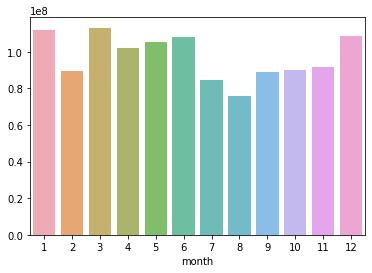

In [11]:
month_sales=data_t.groupby("month")["sales"].sum()
sns.barplot(x=month_sales.index, y=month_sales.values, alpha=0.8)

In [12]:
#month_sales.plot.bar()

sales are increasing every month compare to next year same month.but 2017 1st,3rd month and 2018 6th month sales are decreased

<AxesSubplot:xlabel='month', ylabel='sales'>

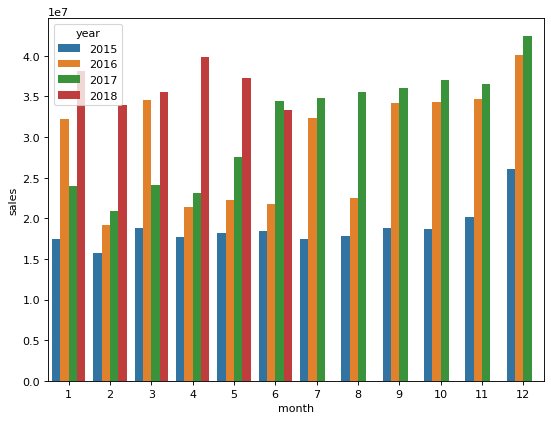

In [13]:
t=data_t.groupby(["year","month"])["sales"].sum().reset_index()
figure(figsize=(8, 6), dpi=80)
sns.barplot(x="month", y="sales", hue="year", data=t)

Every City sales are increasing compare to previous year.in 2016 we can abserve height sales increament

<AxesSubplot:xlabel='city', ylabel='sales'>

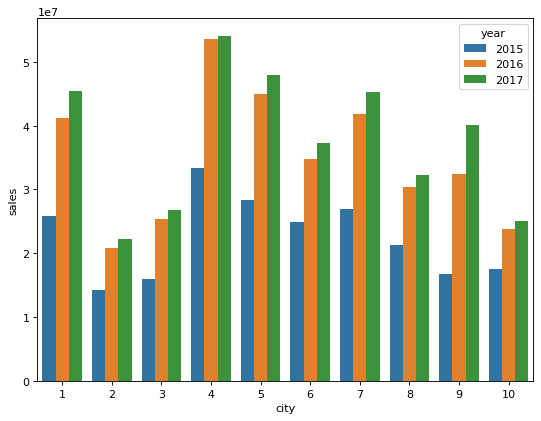

In [14]:
d=data_t.groupby(["year","city"])["sales"].sum().reset_index()
m=d[d["year"]!=2018]
figure(figsize=(8, 6), dpi=80)
sns.barplot(x="city", y="sales", hue="year", data=m)

In [15]:
data_t["half_yearly"]=data_t['month']
data={"half_yearly":{1:0,2:0,3:0,4:0,5:0,6:0,7:1,8:1,9:1,10:1,11:1,12:1}}
data_t = data_t.replace(data)

In [16]:
data_t.head()

,year,month,day,city,medicine,sales,half_yearly
0,2015,1,2,1,1,24.0,0
1,2015,1,2,1,2,144.0,0
2,2015,1,2,1,3,84.0,0
3,2015,1,2,1,4,24.0,0
4,2015,1,2,1,5,8.0,0


we know that every year sales are increasing but in 2017 first half_year sales are not increased,the reason for it is downfall of 1st and 3rd month sales. we can see it in month/year report.city of jaipur and mumbai sales are down in 2017

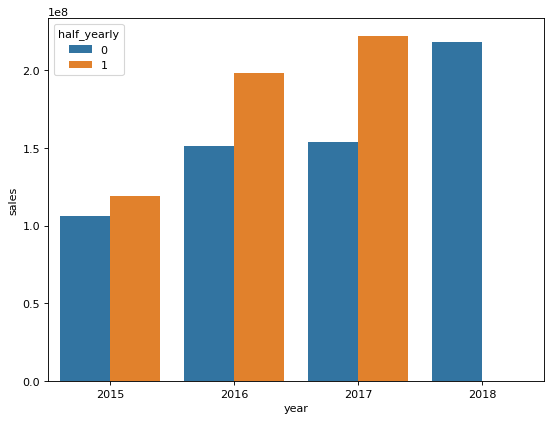

In [17]:
y=data_t.groupby(["year","half_yearly"])["sales"].sum().reset_index()
figure(figsize=(8, 6), dpi=80)
sns.barplot(x="year", y="sales", hue="half_yearly", data=y)
xlabel="year"
ylabel="sales"

Every 1st half year city sales are increasing except 2017 jaipur and mumbai  

<AxesSubplot:xlabel='city', ylabel='sales'>

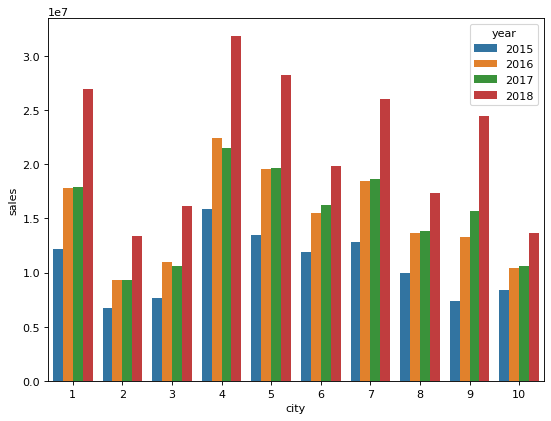

In [18]:
k=data_t.groupby(["half_yearly","year","city"])["sales"].sum().reset_index()
h=k[k["half_yearly"]==0]
figure(figsize=(8, 6), dpi=80)
sns.barplot(x="city", y="sales", hue="year", data=h)


Sales of 2nd half of 2017 is incremental but not as good as 2016

<AxesSubplot:xlabel='city', ylabel='sales'>

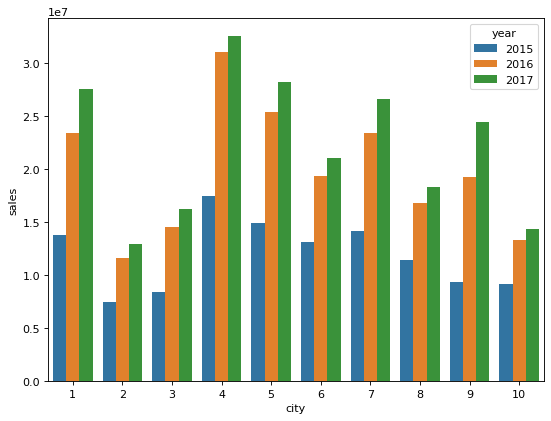

In [19]:
h=k[k["half_yearly"]==1]
figure(figsize=(8, 6), dpi=80)
sns.barplot(x="city", y="sales", hue="year", data=h)

In [20]:
data_t.head()

,year,month,day,city,medicine,sales,half_yearly
0,2015,1,2,1,1,24.0,0
1,2015,1,2,1,2,144.0,0
2,2015,1,2,1,3,84.0,0
3,2015,1,2,1,4,24.0,0
4,2015,1,2,1,5,8.0,0


In [21]:
#med=data_t.groupby(["year","medicine"])["sales"].sum().reset_index()
#figure(figsize=(15, 6), dpi=80)
#sns.barplot(x="medicine", y="sales",data=med,hue="year")

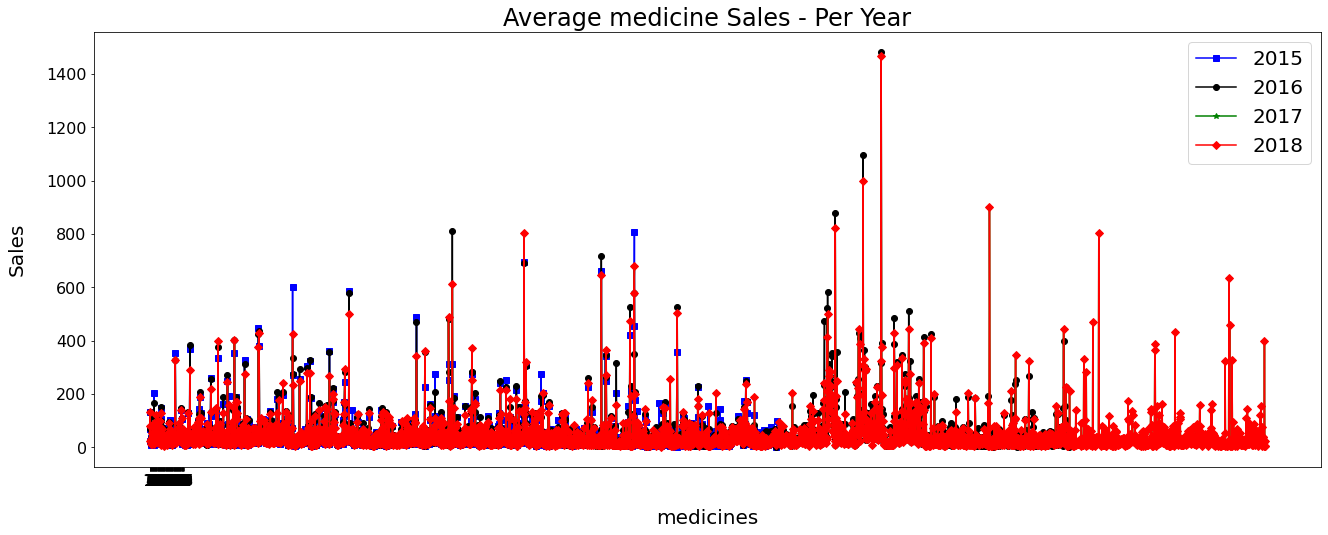

In [22]:
y2015_med = data_t[data_t.year==2015].groupby('medicine')['sales'].mean()
y2016_med = data_t[data_t.year==2016].groupby('medicine')['sales'].mean()
y2017_med = data_t[data_t.year==2017].groupby('medicine')['sales'].mean()
y2018_med = data_t[data_t.year==2018].groupby('medicine')['sales'].mean()


plt.figure(figsize=(22,8))
plt.plot(y2015_med.index, y2015_med.values, 's-b')
plt.plot(y2016_med.index, y2016_med.values, 'o-k')
plt.plot(y2017_med.index, y2017_med.values, '*-g')
plt.plot(y2017_med.index, y2017_med.values, 'D-r')

plt.xticks(np.arange(1, 100, step=1), fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('medicines', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20)

plt.title("Average medicine Sales - Per Year", fontsize=24)
plt.legend(['2015', '2016', '2017','2018'], fontsize=20);

In [23]:
def split_date(df):
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df.date.dt.year
    df['month'] = df.date.dt.month
    df['day'] = df.date.dt.day

In [24]:
dis_data=pd.read_csv("D:\\data_sets\\jaysree\\discount_features-1646155022154.csv")

In [25]:
split_date(dis_data)

In [26]:
dis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17277949 entries, 0 to 17277948
Data columns (total 7 columns):
 #   Column      Dtype         
---  ------      -----         
 0   date        datetime64[ns]
 1   city        int64         
 2   medicine    int64         
 3   discounted  int64         
 4   year        int64         
 5   month       int64         
 6   day         int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 922.7 MB


In [27]:
dis_data.drop("date",axis=1,inplace=True)

In [28]:
dis_data.head()

,city,medicine,discounted,year,month,day
0,1,1,0,2016,4,1
1,1,2,0,2016,4,1
2,1,3,0,2016,4,1
3,1,4,0,2016,4,1
4,1,5,0,2016,4,1


in year 2015 discounts is not there

In [29]:
dis_data.describe()

,city,medicine,discounted,year,month,day
count,1.727795e+07,1.727795e+07,1.727795e+07,1.727795e+07,1.727795e+07,1.727795e+07
mean,5.495701e+00,1.310692e+03,4.624675e-02,2.017024e+03,6.489950e+00,1.573755e+01
std,2.849437e+00,8.549493e+02,2.100190e-01,7.583930e-01,3.269581e+00,8.807160e+00
min,1.000000e+00,1.000000e+00,0.000000e+00,2.016000e+03,1.000000e+00,1.000000e+00
25%,3.000000e+00,5.820000e+02,0.000000e+00,2.016000e+03,4.000000e+00,8.000000e+00
50%,5.000000e+00,1.188000e+03,0.000000e+00,2.017000e+03,6.000000e+00,1.600000e+01
75%,8.000000e+00,1.956000e+03,0.000000e+00,2.018000e+03,9.000000e+00,2.300000e+01
max,1.000000e+01,3.423000e+03,1.000000e+00,2.018000e+03,1.200000e+01,3.100000e+01


In [30]:
dis_data.discounted.value_counts()

0    16478900
1      799049
Name: discounted, dtype: int64

In [31]:
#new_df=train_data.merge(data_t,on=["year","month","day","city","medicine"],how="left")

In [32]:
foot_data=pd.read_csv("D:\\data_sets\\jaysree\\foot_fall-1646154997847.csv")

In [33]:
foot_data1 = pd.melt(foot_data, id_vars=["city"], var_name="date", value_name="footfall")
split_date(foot_data1)

In [34]:
data={"city":{"Mumbai":4,  "Delhi":5,  "Bangalore":7,  "Kolkata":1,  "Chennai":6,  "Hyderabad":8,  "Ahmedabad":9,  "Jaipur":3,  "Lucknow":10,  "Other":2}}
foot_data1 = foot_data1.replace(data)

In [35]:
foot_data1.drop("date",axis=1,inplace=True)

In [36]:
foot_data1.head()

,city,footfall,year,month,day
0,9,9384.0,2015,1,2
1,7,16644.0,2015,1,2
2,6,19544.0,2015,1,2
3,5,16832.0,2015,1,2
4,8,13588.0,2015,1,2


In [37]:
new_df=data_t.merge(dis_data,on=["year","month","day","city","medicine"],how="left")

In [38]:
new_df.head()

,year,month,day,city,medicine,sales,half_yearly,discounted
0,2015,1,2,1,1,24.0,0,NaN
1,2015,1,2,1,2,144.0,0,NaN
2,2015,1,2,1,3,84.0,0,NaN
3,2015,1,2,1,4,24.0,0,NaN
4,2015,1,2,1,5,8.0,0,NaN


In [39]:
new_df.fillna(0,axis=1,inplace=True)

In [40]:
new_df.describe()

,year,month,day,city,medicine,sales,half_yearly,discounted
count,2.266788e+07,2.266788e+07,2.266788e+07,2.266788e+07,2.266788e+07,2.266788e+07,2.266788e+07,2.266788e+07
mean,2.016513e+03,6.212101e+00,1.575006e+01,5.488719e+00,1.170277e+03,5.168782e+01,4.443170e-01,3.273769e-02
std,1.024516e+00,3.451681e+00,8.797949e+00,2.849360e+00,8.021066e+02,1.099643e+02,4.968897e-01,1.779492e-01
min,2.015000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.400000e-02,0.000000e+00,0.000000e+00
25%,2.016000e+03,3.000000e+00,8.000000e+00,3.000000e+00,5.110000e+02,1.200000e+01,0.000000e+00,0.000000e+00
50%,2.017000e+03,6.000000e+00,1.600000e+01,5.000000e+00,1.034000e+03,2.800000e+01,0.000000e+00,0.000000e+00
75%,2.017000e+03,9.000000e+00,2.300000e+01,8.000000e+00,1.718000e+03,5.600000e+01,1.000000e+00,0.000000e+00
max,2.018000e+03,1.200000e+01,3.100000e+01,1.000000e+01,3.389000e+03,8.299200e+04,1.000000e+00,1.000000e+00


<AxesSubplot:xlabel='year', ylabel='sales'>

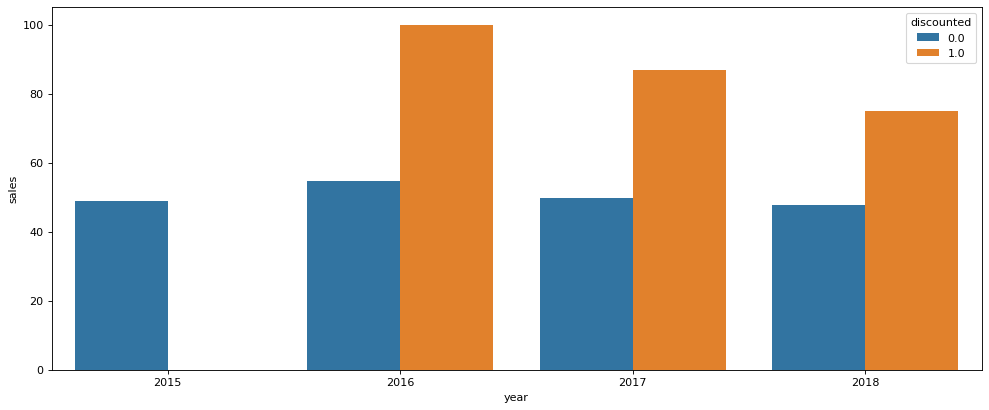

In [41]:
year_dis=new_df.groupby(["year","discounted"])["sales"].mean().reset_index()
figure(figsize=(15, 6), dpi=80)
sns.barplot(x="year", y="sales",data=year_dis,hue="discounted")

<AxesSubplot:xlabel='month', ylabel='sales'>

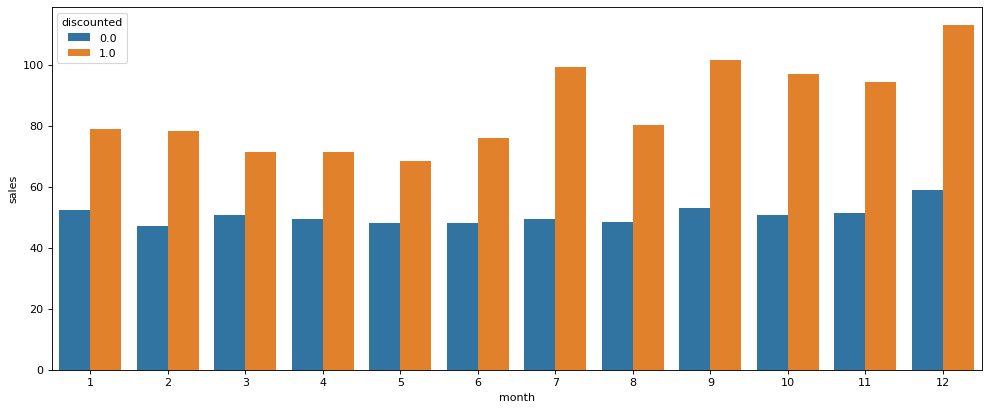

In [42]:
month_dis=new_df.groupby(["month","discounted"])["sales"].mean().reset_index()
figure(figsize=(15, 6), dpi=80)
sns.barplot(x="month", y="sales",data=month_dis,hue="discounted")

In [43]:
new_df1=new_df.merge(foot_data1,on=["year","month","day","city"],how="left")

In [44]:
new_df1.head()

,year,month,day,city,medicine,sales,half_yearly,discounted,footfall
0,2015,1,2,1,1,24.0,0,0.0,13948.0
1,2015,1,2,1,2,144.0,0,0.0,13948.0
2,2015,1,2,1,3,84.0,0,0.0,13948.0
3,2015,1,2,1,4,24.0,0,0.0,13948.0
4,2015,1,2,1,5,8.0,0,0.0,13948.0


In [45]:
td_data=new_df.groupby(["year","month","day","city","discounted"])["sales"].sum().reset_index()

In [46]:
td_data.head()

,year,month,day,city,discounted,sales
0,2015,1,2,1,0.0,96241.392
1,2015,1,2,2,0.0,54081.940
2,2015,1,2,3,0.0,58637.312
3,2015,1,2,4,0.0,120380.724
4,2015,1,2,5,0.0,110448.204


In [47]:
tdf_data=td_data.merge(foot_data1,on=["year","month","day","city"],how="left")

In [48]:
tdf_data.head()

,year,month,day,city,discounted,sales,footfall
0,2015,1,2,1,0.0,96241.392,13948.0
1,2015,1,2,2,0.0,54081.940,8572.0
2,2015,1,2,3,0.0,58637.312,13000.0
3,2015,1,2,4,0.0,120380.724,19284.0
4,2015,1,2,5,0.0,110448.204,16832.0


<AxesSubplot:xlabel='city', ylabel='footfall'>

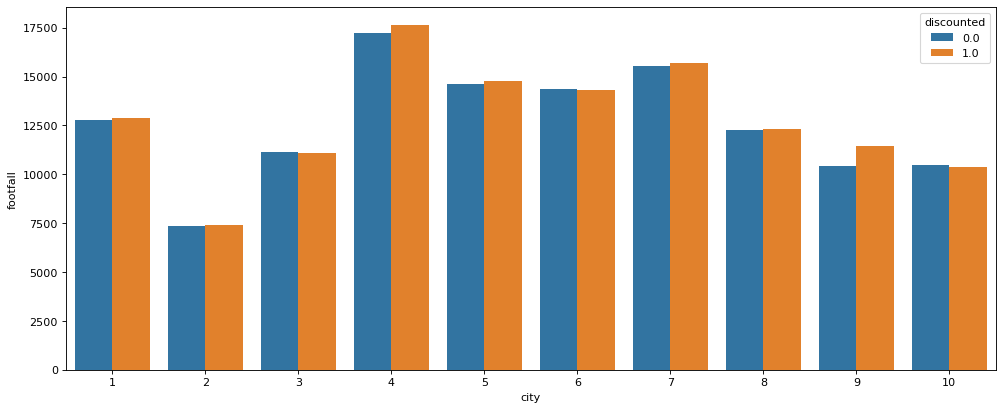

In [49]:
cf_data=tdf_data.groupby(["city","discounted"])["footfall"].mean().reset_index()
figure(figsize=(15, 6), dpi=80)
sns.barplot(x="city", y="footfall",data=cf_data,hue="discounted")

<AxesSubplot:xlabel='city', ylabel='footfall'>

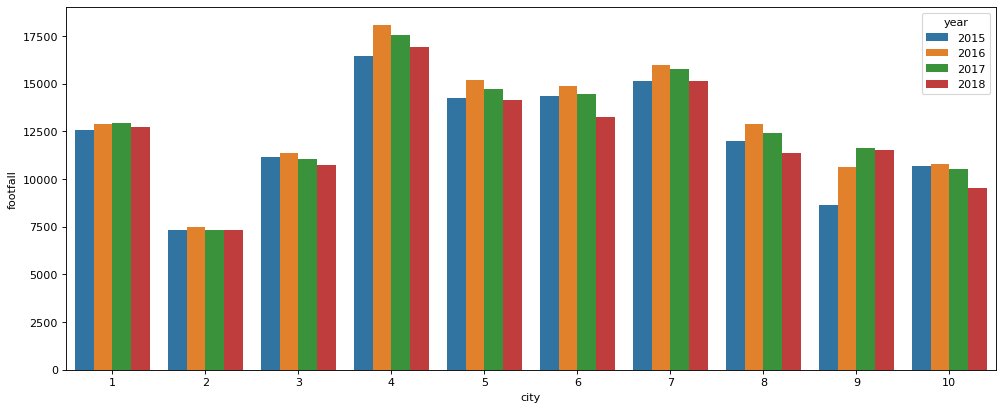

In [50]:
yc_data=tdf_data.groupby(["city","year"])["footfall"].mean().reset_index()
figure(figsize=(15, 6), dpi=80)
sns.barplot(x="city", y="footfall",data=yc_data,hue="year")

<AxesSubplot:xlabel='city'>

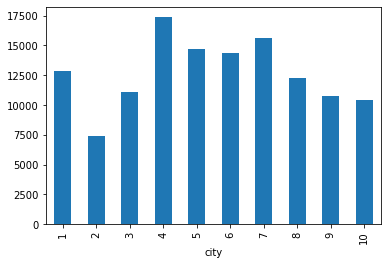

In [51]:
tdf_data.groupby(["city"])["footfall"].mean().plot.bar()


<AxesSubplot:xlabel='year'>

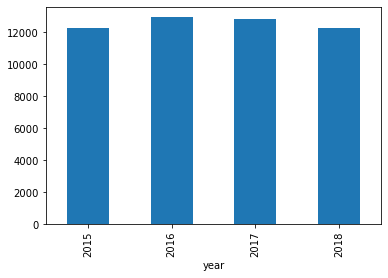

In [52]:
tdf_data.groupby("year")["footfall"].mean().plot.bar()

<AxesSubplot:xlabel='month'>

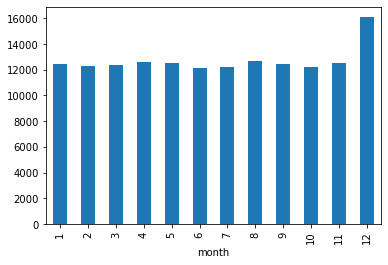

In [53]:
tdf_data.groupby("month")["footfall"].mean().plot.bar()

<AxesSubplot:>

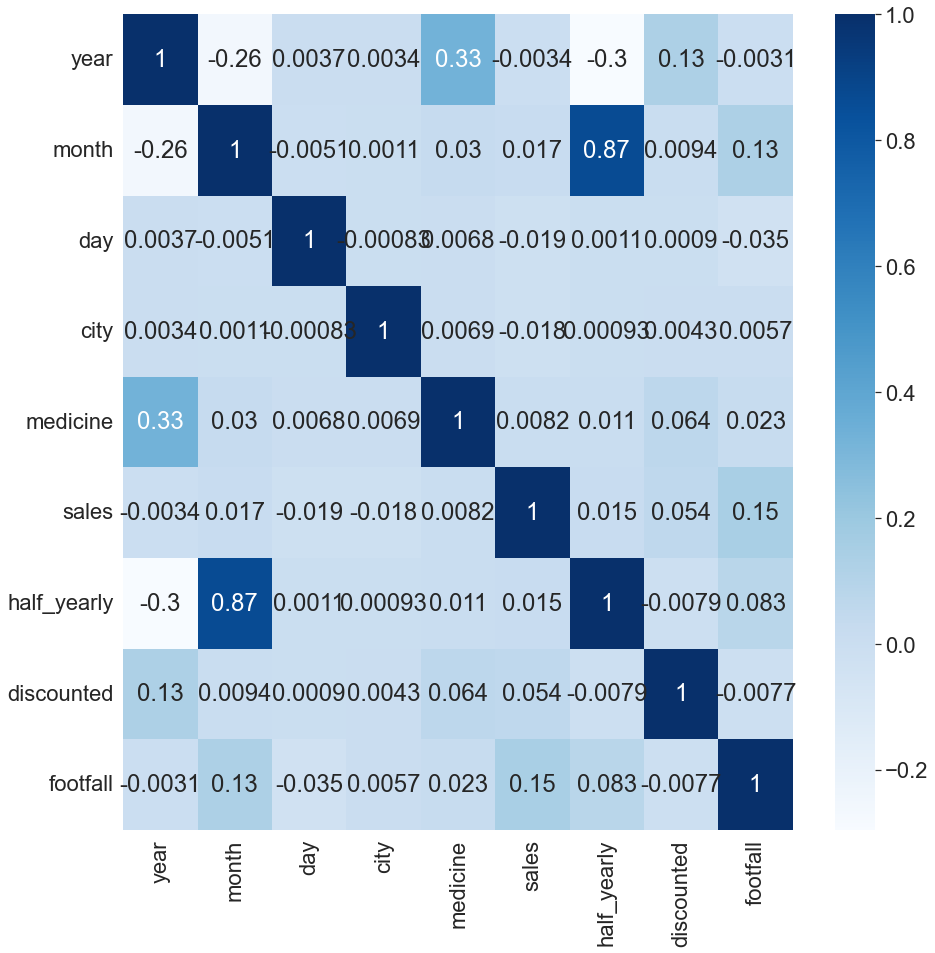

In [54]:
plt.figure(figsize=(15, 15))
sns.set(font_scale=2)
sns.heatmap(new_df1.corr(), annot=True, cmap="Blues", fmt= ".2g")